### EDA for Flickr30K

In [5]:
#Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import random
from collections import Counter
import re

os.chdir("..")

In [12]:
#Paths
DATA_PATH = "./data/raw/"
ANNOTATINS_PATH = os.path.join(DATA_PATH, "flickr_annotations_30k.csv")
IMAGES_PATH = os.path.join(DATA_PATH, "flickr30k-images/")

#Load Annotations
df = pd.read_csv(ANNOTATINS_PATH)
df.head()

,raw,sentids,split,filename,img_id
0,"[""Two young guys with shaggy hair look at thei...","[0, 1, 2, 3, 4]",train,1000092795.jpg,0
1,"[""Several men in hard hats are operating a gia...","[5, 6, 7, 8, 9]",train,10002456.jpg,1
2,"[""A child in a pink dress is climbing up a set...","[10, 11, 12, 13, 14]",train,1000268201.jpg,2
3,"[""Someone in a blue shirt and hat is standing ...","[15, 16, 17, 18, 19]",train,1000344755.jpg,3
4,"[""Two men, one in a gray shirt, one in a black...","[20, 21, 22, 23, 24]",train,1000366164.jpg,4


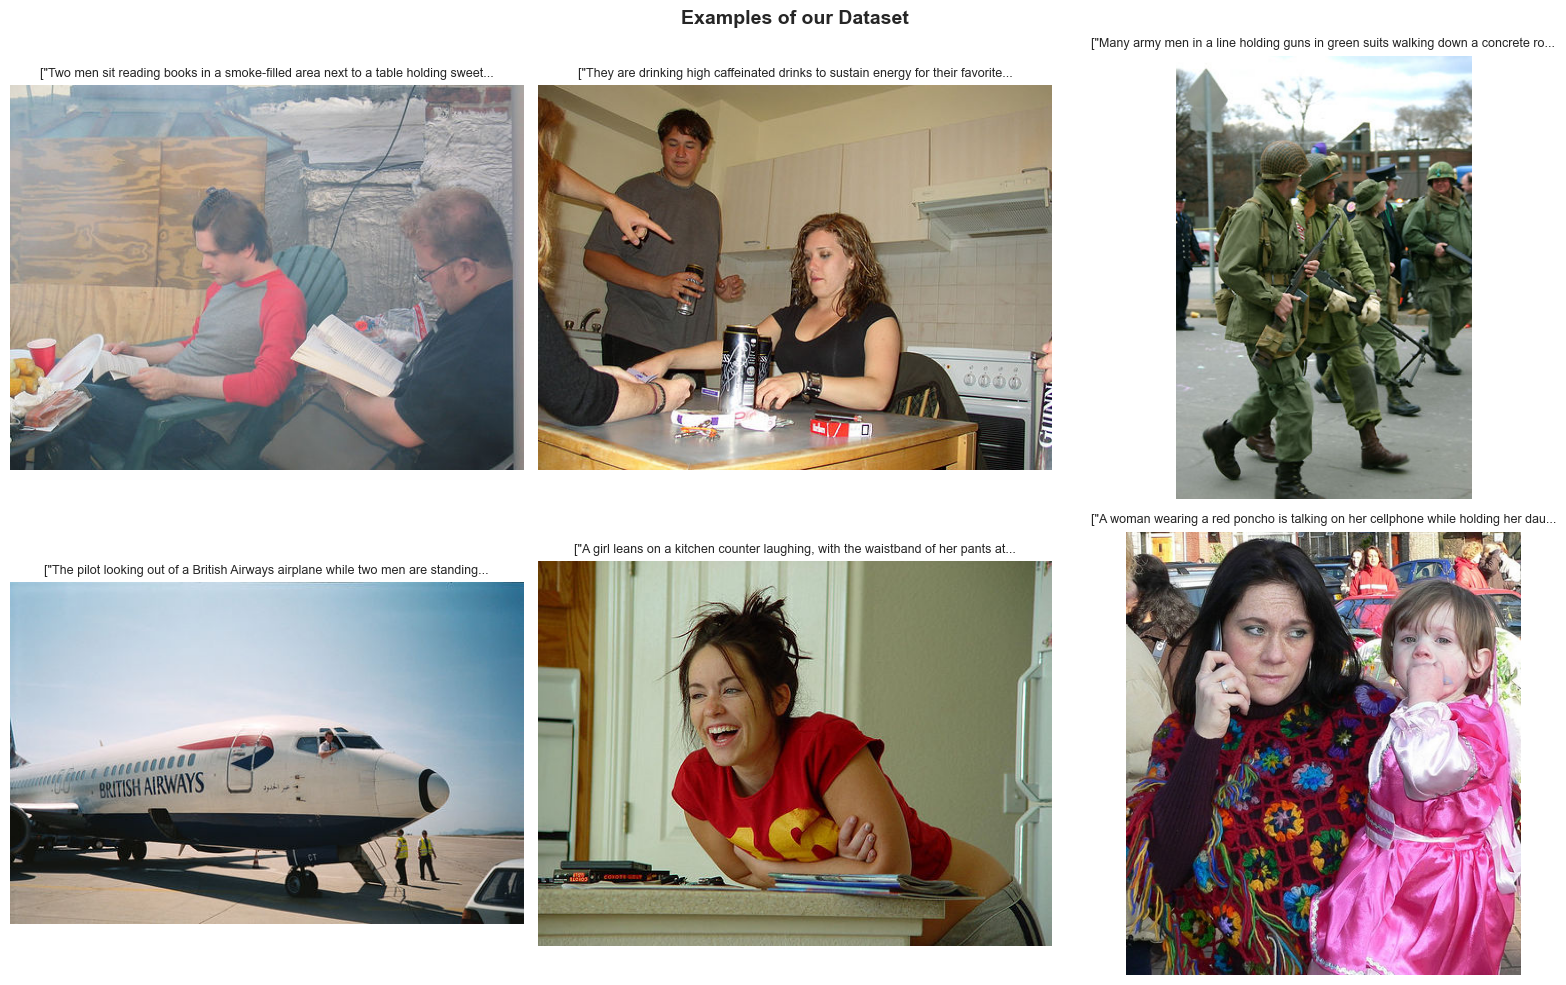

In [48]:
# We plot some examples of images with their captions
selected_filenames = ["371903.jpg","881336.jpg", "1624481.jpg","3035057.jpg","3680138.jpg","4378823.jpg"]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, filename in enumerate(selected_filenames):

    img_data = df[df['filename'] == filename]
    img_captions = img_data['raw'].tolist()
    img_path = os.path.join(IMAGES_PATH,filename)
    img = Image.open(img_path)
    axes[idx].imshow(img)
    axes[idx].axis('off') 
    caption_text = img_captions[0][:80] + "..." if len(img_captions[0]) > 80 else img_captions[0]
    axes[idx].set_title(f"{caption_text}", fontsize=9, wrap=True)

plt.suptitle('Examples of our Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()